# This feature explores the implementation of Feature Scaling from scratch

In [1]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
# load dataset
data = pd.read_csv('exam_data.csv')

In [3]:
data

,study_hours,prev_exam_score
0,8,41
1,13,81
2,3,93
3,13,84
4,10,33
...,...,...
995,3,97
996,11,94
997,6,61
998,3,48


In [4]:
data.describe()

,study_hours,prev_exam_score
count,1000.000000,1000.000000
mean,6.574000,64.916000
std,4.075922,20.535449
min,0.000000,30.000000
25%,3.000000,47.750000
50%,7.000000,65.000000
75%,10.000000,82.250000
max,13.000000,99.000000


We see that the data has 2 features <i><b>study_hours</b></i> and <i><b>prev_exam_score</b></i>.<br>
Both are of different ranges. The first one ranges from <b>0-13</b> and the latter one ranges from <b>30-99</b>.<br>

Text(0.5, 0, 'prev_exam_score')

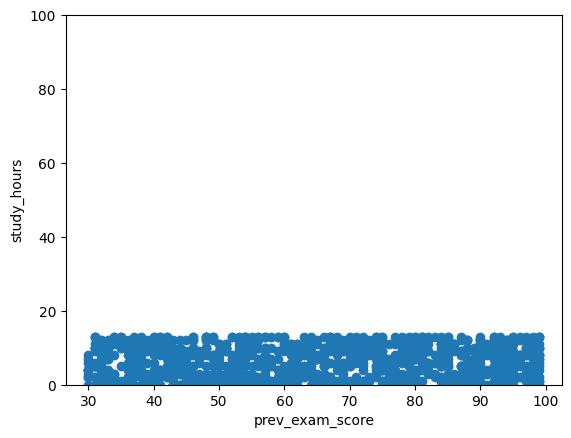

In [5]:
# plot scatter of data
plt.scatter(data['prev_exam_score'],data['study_hours'])
plt.ylim(0,100)
plt.ylabel('study_hours')
plt.xlabel('prev_exam_score')

We see that from above plot, 2 features have significantly different scales.

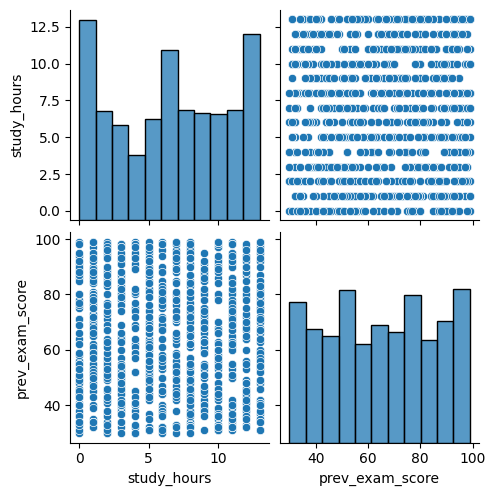

In [6]:
# plotting pairplots
sns.pairplot(data=data)

We see that scales vary significantly. So we apply feature scaling to avoid domination of features. Here, if a model is trained on raw data, the feature prev_exam_score tends to dominate in predictions/decision making.

So now we implement feature scaling.<br>

## 1st Method - Normalization

Formula: 
$x_{\text{norm}} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$

In [7]:
# create an empty dataframe to store scaled values in a new dataframe - scaled_data
scaled_data = pd.DataFrame()

# run a loop to update the values
for x in data.columns:
    scaled_data[x] = (data[x] - data[x].min())/(data[x].max() - data[x].min())

In [8]:
scaled_data

,study_hours,prev_exam_score
0,0.615385,0.159420
1,1.000000,0.739130
2,0.230769,0.913043
3,1.000000,0.782609
4,0.769231,0.043478
...,...,...
995,0.230769,0.971014
996,0.846154,0.927536
997,0.461538,0.449275
998,0.230769,0.260870


In [9]:
# see statistical description of the new dataframe
scaled_data.describe()

,study_hours,prev_exam_score
count,1000.000000,1000.000000
mean,0.505692,0.506029
std,0.313532,0.297615
min,0.000000,0.000000
25%,0.230769,0.257246
50%,0.538462,0.507246
75%,0.769231,0.757246
max,1.000000,1.000000


In [10]:
scaled_data.describe().loc[['min','max'],:]

,study_hours,prev_exam_score
min,0.0,0.0
max,1.0,1.0


We see that data has been scaled appropriately as in Normalization.

Text(0.5, 0, 'prev_exam_score')

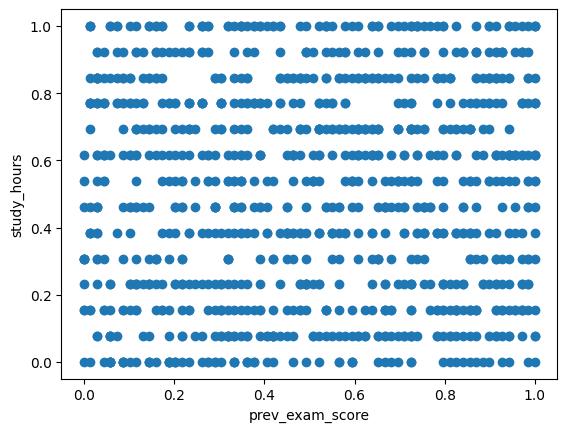

In [11]:
# plot graphs for normalized data
plt.scatter(scaled_data['prev_exam_score'],scaled_data['study_hours'])
plt.ylabel('study_hours')
plt.xlabel('prev_exam_score')

Though the plot looks a bit wierd, we see that the features <i>study_hours</i> and <i>prev_exam_score</i> are in the same range - 0 to 1.

(array([147.,  80.,  70., 122.,  63.,  62., 160.,  78.,  81., 137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

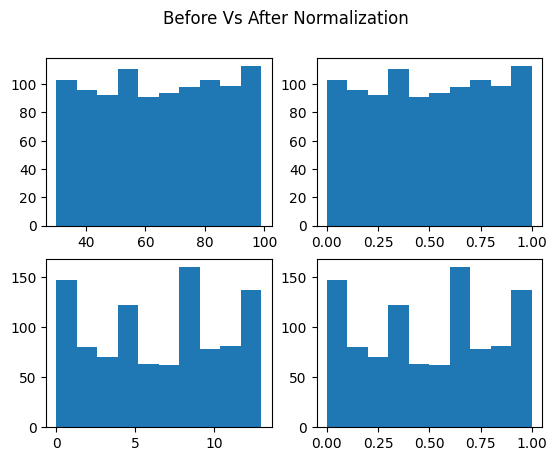

In [12]:
# plot distribution of variables before and after scaling
fig,ax = plt.subplots(2,2)
fig.suptitle('Before Vs After Normalization')
ax[0,0].hist(data['prev_exam_score'])
ax[0,1].hist(scaled_data['prev_exam_score'])
ax[1,0].hist(data['study_hours'])
ax[1,1].hist(scaled_data['study_hours'])

## 2nd Method - Standardisation

Formula: $x_{\text{standard}} = \frac{x - \mu}{\sigma}$

In [13]:
# create an empty dataframe to store scaled values in a new dataframe - scaled_data
scaled_data_1 = pd.DataFrame()

# run a loop to update the values
for x in data.columns:
    scaled_data_1[x] = (data[x] - data[x].mean())/(data[x].std())

In [14]:
scaled_data_1

,study_hours,prev_exam_score
0,0.349860,-1.164620
1,1.576576,0.783231
2,-0.876857,1.367586
3,1.576576,0.929320
4,0.840546,-1.554191
...,...,...
995,-0.876857,1.562372
996,1.085889,1.416283
997,-0.140827,-0.190695
998,-0.876857,-0.823746


In [15]:
scaled_data_1.describe().round(2)

,study_hours,prev_exam_score
count,1000.00,1000.00
mean,0.00,0.00
std,1.00,1.00
min,-1.61,-1.70
25%,-0.88,-0.84
50%,0.10,0.00
75%,0.84,0.84
max,1.58,1.66


In [16]:
scaled_data_1.describe().round(2).loc[['mean','std','min','max'],:]

,study_hours,prev_exam_score
mean,0.00,0.00
std,1.00,1.00
min,-1.61,-1.70
max,1.58,1.66


We see that data has been scaled to mean of 0 and standard deviation of 1.

(array([147.,  80.,  70., 122.,  63.,  62., 160.,  78.,  81., 137.]),
 array([-1.61288675, -1.29394048, -0.97499421, -0.65604794, -0.33710167,
        -0.0181554 ,  0.30079087,  0.61973714,  0.93868341,  1.25762968,
         1.57657595]),
 <BarContainer object of 10 artists>)

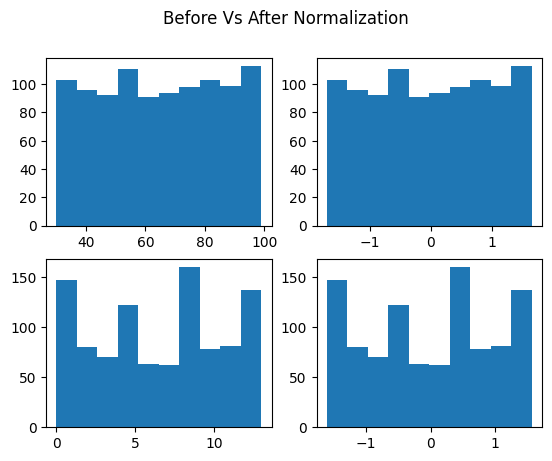

In [17]:
# plot distribution of variables before and after scaling
fig,ax = plt.subplots(2,2)
fig.suptitle('Before Vs After Normalization')
ax[0,0].hist(data['prev_exam_score'])
ax[0,1].hist(scaled_data_1['prev_exam_score'])
ax[1,0].hist(data['study_hours'])
ax[1,1].hist(scaled_data_1['study_hours'])